In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent.parent.resolve()))

from core.config import PROJECT_DIR

In [2]:
from core.config import load_env_vars

load_env_vars()

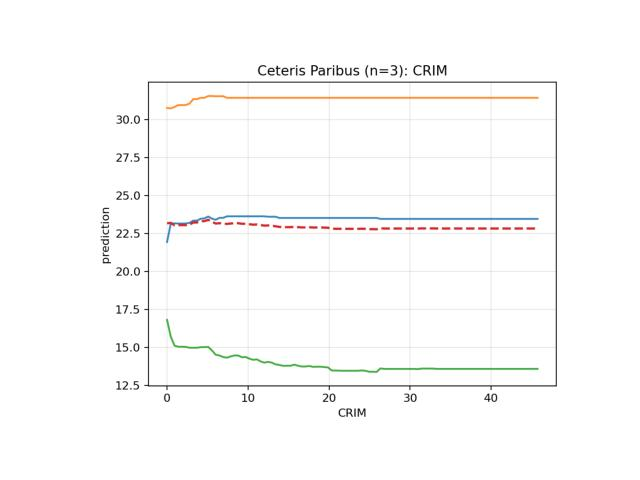

###	 prompt 	###
'Describe the contents of this image. explain what the context might be.'

getting answer...

###	 Response 	###
The graph shows us a measure labeled CRIM having an effect on a measure called Prediction. The header Ceteris Paribus (n=3) - CRIM implies that this effect is being examined in the context of other factors being kept constant. In this graph, the variable of interest is CRIM, which ranges from 0 to 40. A higher CRIM value is associated with higher prediction values, especially above 10. A higher CRIM value above 35 was consistently the highest prediction values (around 30). The CRIM value suggested the highest prediction value around a value of -20. The lowest value of prediction was observed at the range of 5 as it is about 12.50



In [ ]:
from core.model import make_text_generation_model_open_router
import base64
from langchain_core.messages import HumanMessage
from IPython.display import Image as im
from IPython.display import display as dis
 
if __name__ == '__main__':
    # Initialize the language model with a specific model ID
    llm = make_text_generation_model_open_router( # get vision language models here : https://openrouter.ai/models?fmt=cards&input_modalities=image&max_price=0
        # model_id='z-ai/glm-4.5-air:free'
        # model_id='google/gemini-2.0-flash-exp:free'
        model_id='nvidia/nemotron-nano-12b-v2-vl:free'
    )

        
    with open('./temp.jpg', "rb") as image_file:
        # Read the binary data of the image
        image_data = image_file.read()
        # Encode the binary data to Base64
        image_data = base64.b64encode(image_data).decode("utf-8")
        # 3. Get image bytes and base64-encode them
        
    # image_data = base64.b64encode(httpx.get(image_url).content).decode("utf-8")

    # 4. Build a multimodal HumanMessage (text + image)
    message = HumanMessage(
        content=[
            {"type": "text", "text": "Describe the contents of this image. explain what the context might be."},
            {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image_data}"},
            },
        ]
    )
    
    dis(im('./temp.jpg'))
    print(f"###\t prompt \t###")
    print(f"'Describe the contents of this image. explain what the context might be.'\n")
    print("getting answer...\n")
    # 5. Call the model with invoke()
    response = llm.invoke([message])
    print(f"###\t Response \t###")
    print(response.content) 
